In [147]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [148]:
data = pd.read_csv("/content/breast_cancer.csv")

In [149]:
data.head(10)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [150]:
data.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [151]:
x = data.iloc[:,1:-1].values
x

array([[ 5,  1,  1, ...,  3,  1,  1],
       [ 5,  4,  4, ...,  3,  2,  1],
       [ 3,  1,  1, ...,  3,  1,  1],
       ...,
       [ 5, 10, 10, ...,  8, 10,  2],
       [ 4,  8,  6, ..., 10,  6,  1],
       [ 4,  8,  8, ..., 10,  4,  1]])

In [152]:
y = data.iloc[:,-1]
y

0      2
1      2
2      2
3      2
4      2
      ..
678    2
679    2
680    4
681    4
682    4
Name: Class, Length: 683, dtype: int64

##**Splitting data into Training and Testing set**

In [153]:
from sklearn.model_selection import train_test_split 
x_train, x_test , y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 2 )

#**Logistic** Regresion 

In [154]:
from sklearn.linear_model import LogisticRegression
classifierl = LogisticRegression()
classifierl.fit(x_train,y_train)


LogisticRegression()

In [155]:
y_pred = classifierl.predict(x_test)

##**Confusion Matrix**

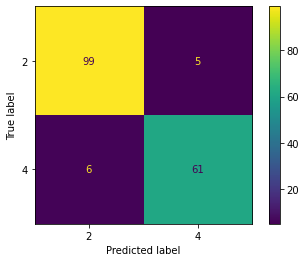

In [156]:
from sklearn.metrics import confusion_matrix,accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt 
cm = confusion_matrix(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred, labels=classifierl.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifierl.classes_)
disp.plot()
plt.show()

##**Accuracy** 

In [157]:
accuracy_score(y_test,y_pred)

0.935672514619883

#**Support Vector classifier**

In [158]:
from sklearn.svm import SVC
classifiers = SVC(C=1.0, kernel='linear',random_state=5 ,degree=5)
classifiers.fit(x_train,y_train)

SVC(degree=5, kernel='linear', random_state=5)

In [159]:
y_pred = classifiers.predict(x_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

##**Confusion Matrix** 

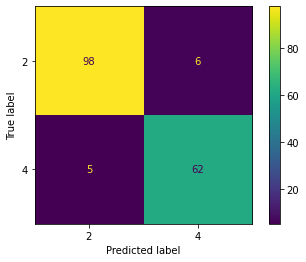

In [160]:
from sklearn.metrics import confusion_matrix,accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt 
cm = confusion_matrix(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred, labels=classifiers.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifiers.classes_)
disp.plot()
plt.show()

###**Accuracy Score** 

In [161]:
accuracy_score(y_test,y_pred)

0.935672514619883

#**Naive Bayes**

In [162]:
from sklearn.naive_bayes import GaussianNB
classifiern = GaussianNB()
classifiern.fit(x_train,y_train)

GaussianNB()

In [163]:
y_pred = classifiern.predict(x_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

##**Confusion Matrix** 

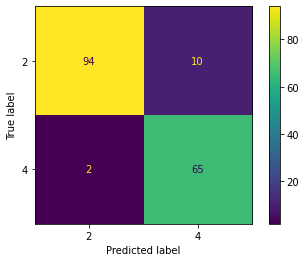

In [164]:
from sklearn.metrics import confusion_matrix,accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt 
cm = confusion_matrix(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred, labels=classifiern.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifiern.classes_)
disp.plot()
plt.show()

###**Accuracy Score** 

In [165]:
accuracy_score(y_test,y_pred)

0.9298245614035088

#**Decision Tree**

In [166]:
from sklearn.tree import DecisionTreeClassifier
classifierd = DecisionTreeClassifier(criterion='entropy',random_state = 0)
classifierd.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [167]:
y_pred = classifierd.predict(x_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

##**Confusion Matrix** 

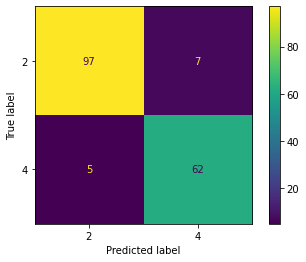

In [168]:
from sklearn.metrics import confusion_matrix,accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt 
cm = confusion_matrix(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred, labels=classifierd.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifierd.classes_)
disp.plot()
plt.show()

###**Accuracy Score** 

In [169]:
accuracy_score(y_test,y_pred)

0.9298245614035088

#**Random Forest Classifier**

In [170]:
from sklearn.ensemble import RandomForestClassifier
classifierr = RandomForestClassifier(random_state = 0 )
classifierr.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [171]:
y_pred = classifierr.predict(x_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

##**Confusion Matrix** 

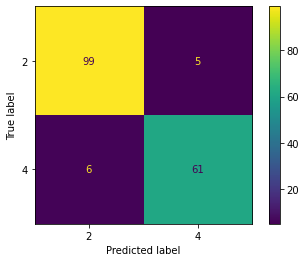

In [172]:
from sklearn.metrics import confusion_matrix,accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt 
cm = confusion_matrix(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred, labels=classifierr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifierr.classes_)
disp.plot()
plt.show()

###**Accuracy Score** 

In [173]:
accuracy_score(y_test,y_pred)

0.935672514619883